# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622
['punta arenas', 'adamstown', 'flying fish cove', 'grytviken', 'nampa', 'port mathurin', 'toliara', 'kodiak', 'taiohae', 'bethel', 'yuzhno-kurilsk', 'bamboo flat', 'lebu', "abraham's bay", 'alice springs', 'byron bay', 'peniche', 'jambi city', 'fale old settlement', 'blackmans bay', 'puerto natales', 'lihue', 'goulburn', 'strezhevoy', 'papatowai', 'ahau', 'ushuaia', 'fort irwin', 'nova sintra', 'weno', 'carandai', 'popondetta', 'invercargill', 'saudarkrokur', 'saldanha', 'hammerfest', 'vadso', 'blythe', 'thompson', 'enewetak', 'waitangi', 'yellowknife', 'sombrerete', 'selfoss', 'karkira', 'vera cruz', 'mount isa', 'vorgashor', 'san luis de la loma', 'hawaiian paradise park', 'bilibino', 'brookings', 'deoria', 'afaahiti', 'sao vicente', 'tazovsky', 'cidreira', 'tutoia', 'ancud', 'bayganin', 'smithers', 'moratuwa', 'sefrou', "bei'an", 'newton', 'rio segundo', 'dalmau', 'wailua homesteads', 'margaret river', 'bathsheba', 'tiksi', 'priargunsk', 'swift curr

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()
    

        if "coord" in city_weather_json:
            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather_json["coord"]["lat"]
            city_lng = city_weather_json["coord"]["lon"]
            city_max_temp = city_weather_json["main"]["temp_max"]
            city_humidity = city_weather_json["main"]["humidity"]
            city_clouds = city_weather_json["clouds"]["all"]
            city_wind = city_weather_json["wind"]["speed"]
            city_country = city_weather_json["sys"]["country"]
            city_date = city_weather_json["dt"]

            # Append the City information into city_data list
            city_data.append({"City": city,
                      "Lat": city_lat,
                      "Lng": city_lng,
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_clouds,
                      "Wind Speed": city_wind,
                      "Country": city_country,
                      "Date": city_date})
        else:
            print(f"City {city} not found. Skipping...")

    # If an error is experienced, skip the city
    except requests.exceptions.RequestException as e:
        print(f"Request error for city {city}: {e}")
        continue


    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | flying fish cove
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | nampa
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | toliara
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | taiohae
City taiohae not found. Skipping...
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | yuzhno-kurilsk
Processing Record 12 of Set 1 | bamboo flat
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | abraham's bay
City abraham's bay not found. Skipping...
Processing Record 15 of Set 1 | alice springs
Processing Record 16 of Set 1 | byron bay
Processing Record 17 of Set 1 | peniche
Processing Record 18 of Set 1 | jambi city
Processing Record 19 of Set 1 | fale old settlement
Processing Record 20 of Set 1 | blackmans bay
Processi

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,59.11,41,0,12.66,CL,1741797952
1,adamstown,-25.0660,-130.1015,76.35,61,85,12.10,PN,1741798114
2,flying fish cove,-10.4217,105.6791,78.48,94,100,5.75,CX,1741798115
3,grytviken,-54.2811,-36.5092,33.84,76,65,15.08,GS,1741798116
4,nampa,43.5407,-116.5635,48.79,53,100,5.75,US,1741797863


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,59.11,41,0,12.66,CL,1741797952
1,adamstown,-25.0660,-130.1015,76.35,61,85,12.10,PN,1741798114
2,flying fish cove,-10.4217,105.6791,78.48,94,100,5.75,CX,1741798115
3,grytviken,-54.2811,-36.5092,33.84,76,65,15.08,GS,1741798116
4,nampa,43.5407,-116.5635,48.79,53,100,5.75,US,1741797863


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

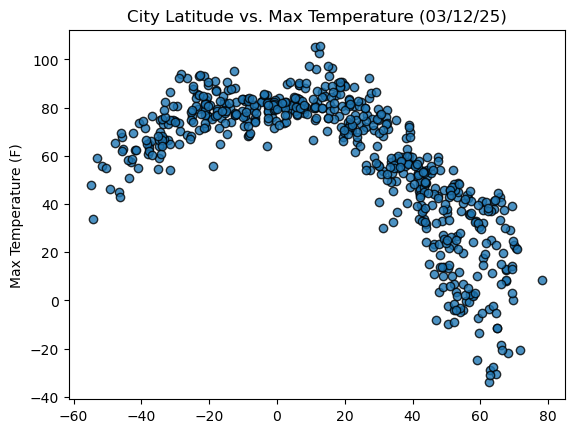

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities") 

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

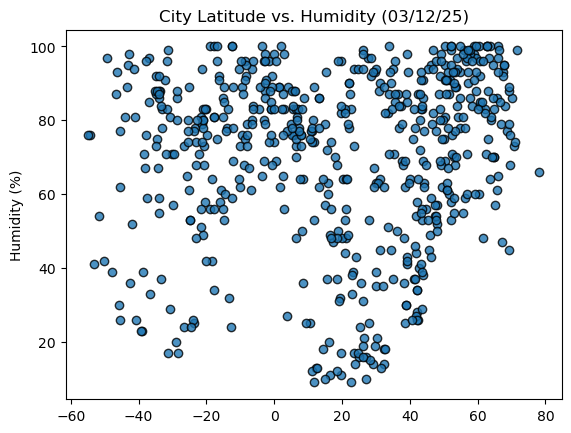

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")      

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

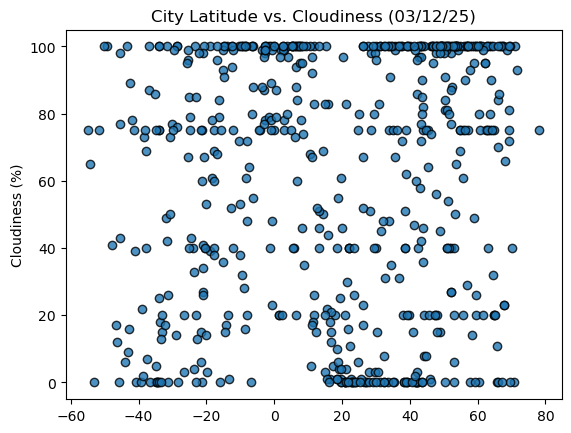

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

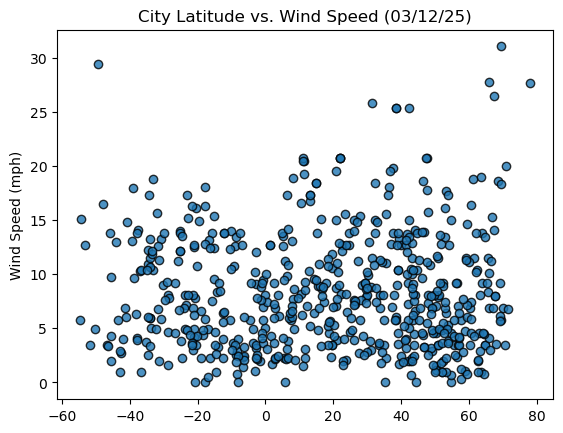

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()  

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,nampa,43.5407,-116.5635,48.79,53,100,5.75,US,1741797863
7,kodiak,57.7900,-152.4072,24.31,86,0,5.75,US,1741798120
8,bethel,41.3712,-73.4140,51.73,37,47,4.00,US,1741798204
9,yuzhno-kurilsk,44.0306,145.8556,31.77,91,82,6.64,RU,1741798205
10,bamboo flat,11.7000,92.7167,82.49,74,20,2.30,IN,1741798206


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,59.11,41,0,12.66,CL,1741797952
1,adamstown,-25.0660,-130.1015,76.35,61,85,12.10,PN,1741798114
2,flying fish cove,-10.4217,105.6791,78.48,94,100,5.75,CX,1741798115
3,grytviken,-54.2811,-36.5092,33.84,76,65,15.08,GS,1741798116
5,port mathurin,-19.6833,63.4167,80.94,76,3,14.88,MU,1741798118


###  Temperature vs. Latitude Linear Regression Plot

In [22]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.8485674813285455


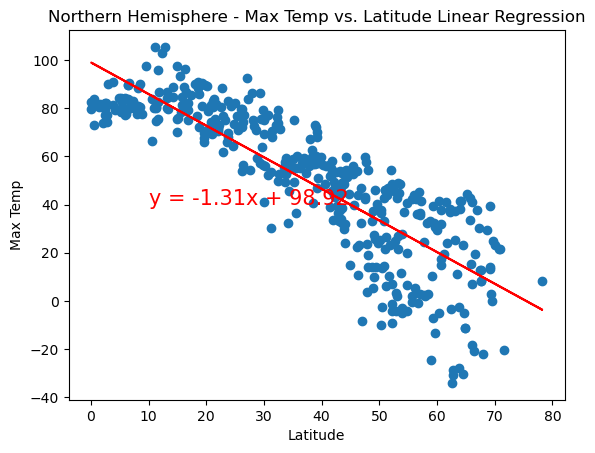

In [24]:
# Northern Hemisphere
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 'Max Temp',(10,40))

The r-squared is: 0.6229595658187436


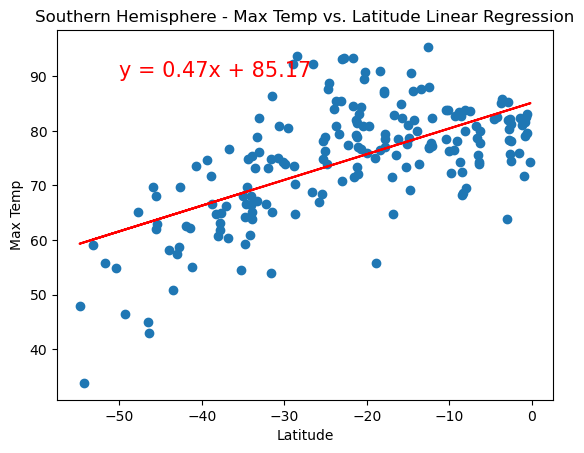

In [25]:
# Southern Hemisphere
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 'Max Temp',(-50,90))

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.27568792372220224


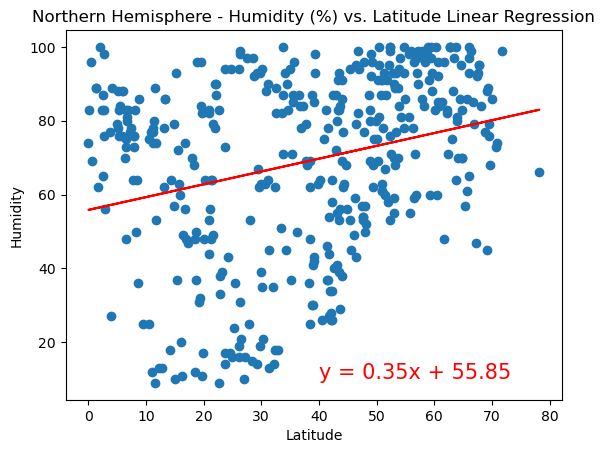

In [26]:
# Northern Hemisphere
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 'Humidity',(40,10))

The r-squared is: 0.2837061753507345


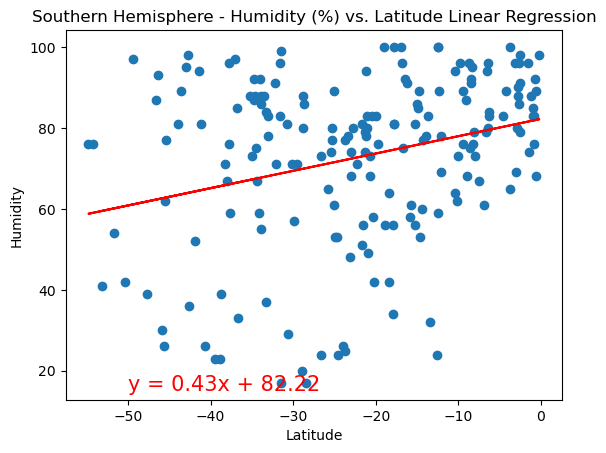

In [27]:
# Southern Hemisphere
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 'Humidity',(-50,15))

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.1364763122081612


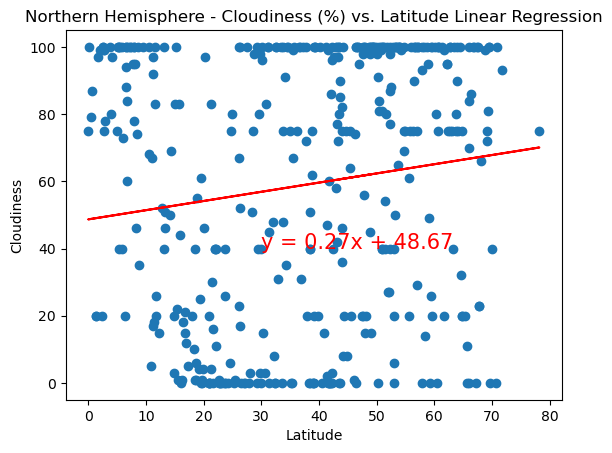

In [28]:
# Northern Hemisphere
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 'Cloudiness',(30,40))

The r-squared is: 0.322876348238647


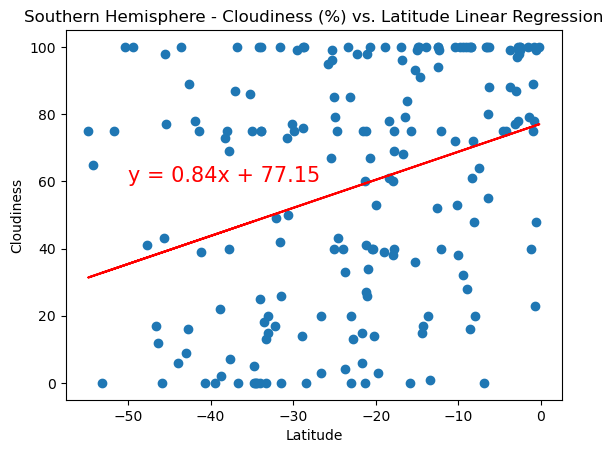

In [29]:
# Southern Hemisphere
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 'Cloudiness',(-50,60))